In [38]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [39]:
data = pd.read_csv('result6w.txt', sep=' ', index_col=0)
print 'Cases computed:', str(len(data))

Cases computed: 80


There are no occurences where the representative periods lead to a feasible solution and the full year representation does not

In [40]:
data[(~data['E_repr'].isnull() & data['E_full'].isnull())]

,A,V,P,E_repr,E_full


There are two cases where the representative periods lead to an infeasible solution and the full year is feasible

In [41]:
data[(data['E_repr'].isnull() & ~data['E_full'].isnull())]

,A,V,P,E_repr,E_full
8,40000.0,50000.0,4350000.0,NaN,1.930244e+07
13,60000.0,50000.0,4350000.0,NaN,1.781114e+07
18,80000.0,50000.0,4350000.0,NaN,1.692061e+07


Cases where both are infeasible

In [42]:
print 'Infeasible solutions:', str(len(data[(data['E_repr'].isnull() & data['E_full'].isnull())]))
data[(data['E_repr'].isnull() & data['E_full'].isnull())]

Infeasible solutions: 18


,A,V,P,E_repr,E_full
0,20000.0,50000.0,3600000.0,NaN,NaN
1,20000.0,50000.0,3850000.0,NaN,NaN
2,20000.0,50000.0,4100000.0,NaN,NaN
3,20000.0,50000.0,4350000.0,NaN,NaN
5,40000.0,50000.0,3600000.0,NaN,NaN
6,40000.0,50000.0,3850000.0,NaN,NaN
7,40000.0,50000.0,4100000.0,NaN,NaN
10,60000.0,50000.0,3600000.0,NaN,NaN
11,60000.0,50000.0,3850000.0,NaN,NaN
12,60000.0,50000.0,4100000.0,NaN,NaN


In [43]:
data = data.dropna()
data = data.rename(columns={'E_repr': 'Representative', 'E_full': 'Full year'})
data

,A,V,P,Representative,Full year
4,20000.0,50000.0,4600000.0,2.173864e+07,2.185454e+07
9,40000.0,50000.0,4600000.0,1.922343e+07,1.929285e+07
14,60000.0,50000.0,4600000.0,1.752657e+07,1.780273e+07
19,80000.0,50000.0,4600000.0,1.700176e+07,1.691263e+07
22,20000.0,75000.0,4100000.0,2.195950e+07,2.208876e+07
23,20000.0,75000.0,4350000.0,2.195445e+07,2.207651e+07
24,20000.0,75000.0,4600000.0,2.194957e+07,2.206592e+07
26,40000.0,75000.0,3850000.0,1.944729e+07,1.953137e+07
27,40000.0,75000.0,4100000.0,1.944231e+07,1.951895e+07
28,40000.0,75000.0,4350000.0,1.943757e+07,1.950928e+07


In [44]:
data_split = pd.melt(data, id_vars=['A', 'P', 'V'], value_vars=['Representative', 'Full year'],
                    var_name='Optimization', value_name='Energy')
data_split

,A,P,V,Optimization,Energy
0,20000.0,4600000.0,50000.0,Representative,2.173864e+07
1,40000.0,4600000.0,50000.0,Representative,1.922343e+07
2,60000.0,4600000.0,50000.0,Representative,1.752657e+07
3,80000.0,4600000.0,50000.0,Representative,1.700176e+07
4,20000.0,4100000.0,75000.0,Representative,2.195950e+07
5,20000.0,4350000.0,75000.0,Representative,2.195445e+07
6,20000.0,4600000.0,75000.0,Representative,2.194957e+07
7,40000.0,3850000.0,75000.0,Representative,1.944729e+07
8,40000.0,4100000.0,75000.0,Representative,1.944231e+07
9,40000.0,4350000.0,75000.0,Representative,1.943757e+07


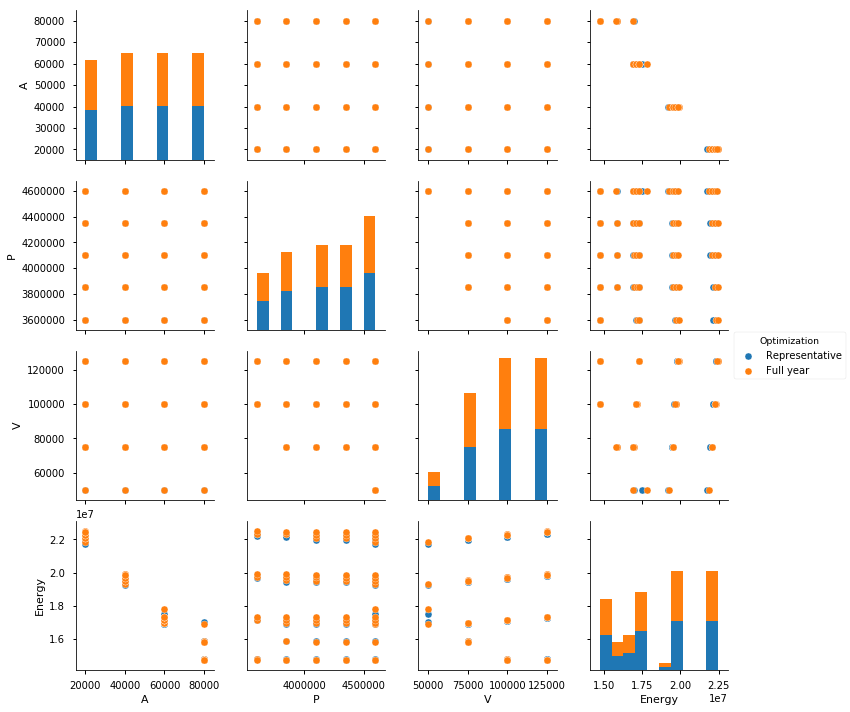

In [45]:
sns.pairplot(data_split, hue='Optimization')

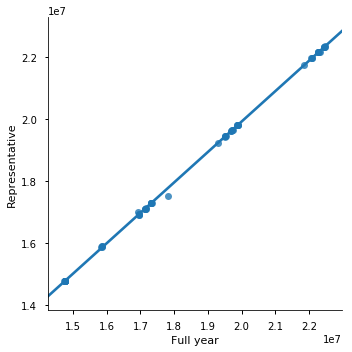

In [46]:
sns.lmplot('Full year', 'Representative', data, )

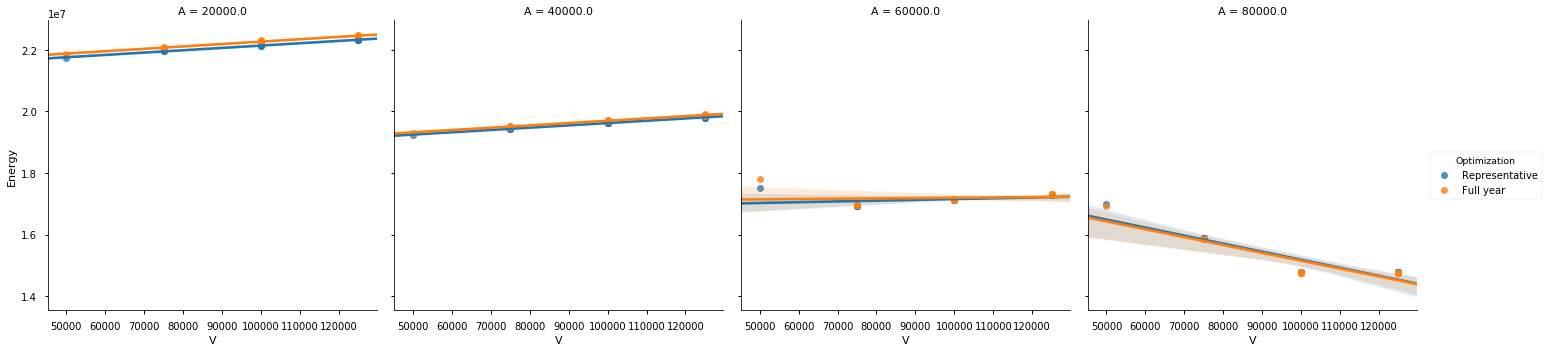

In [47]:
sns.lmplot(x='V', y='Energy', data=data_split, col='A', hue='Optimization')

In [48]:
import numpy as np

sns.set_context("notebook")

import matplotlib.patches as mpatches



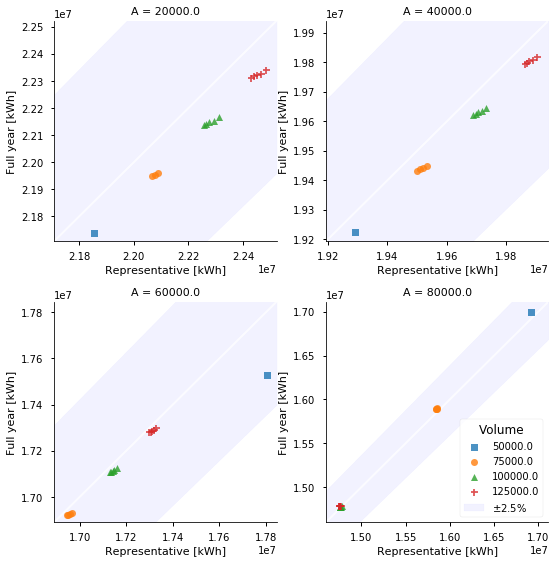

In [49]:
g = sns.lmplot(x='Full year', y='Representative', data=data, fit_reg=False, hue='V', col='A', col_wrap=2, size=4,
               markers=['s', 'o', '^', '+'], sharex=False, sharey=False, legend=False)
acc = 0.025

for axnum, ax in enumerate(g.axes):
    limmin = np.min([ax.get_xlim(), ax.get_ylim()])
    limmax = np.max([ax.get_xlim(), ax.get_ylim()])
    
    ax.set_xlim(limmin, limmax)
    ax.set_ylim(limmin, limmax)
    
    ax.set_xlabel('Representative [kWh]')
    ax.set_ylabel('Full year [kWh]')
    
    # now plot both limits against eachother
    g.axes[axnum].plot([limmin, limmax], [limmin, limmax], 'w-',linewidth=2, alpha=0.75, zorder=0)
    g.axes[axnum].fill_between([limmin, limmax], [(1-acc)*limmin, (1-acc)*limmax], [(1+acc)*limmin, (1+acc)*limmax], zorder=-1, alpha=0.05, color='b', label='$\pm$'+str(100*acc)+'%')

g.axes[-1].legend(loc='lower right', title='Volume')
plt.savefig('SingleNode.png', dpi=600)

In [92]:
for ax in g.axes:
    ax.plot([1.4e7, 2.3e7],[1.4e7, 2.3e7], linestyle=':',linewidth=0.5)

In [ ]:
g.

In [94]:
for ax in g.axes:
    ax.plot([1.4e7, 2.3e7],[1.4e7, 2.3e7], linestyle=':',linewidth=0.5, ax=ax)

TypeError: inner() got multiple values for keyword argument 'ax'